In [13]:
pip install pandas seaborn matplotlib scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 27.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# iris 데이터셋 로드
iris = sns.load_dataset("iris")


In [17]:
# 처음 5개 행 출력
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [19]:
# 컬럼별 요약 통계
print(iris.describe())

# 품종별 평균
print(iris.groupby('species').mean())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.428         1.462        0.246
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026


In [21]:
# 숫자형 컬럼만 추출해서 상관관계 분석
correlation = iris.select_dtypes(include=['float64', 'int64']).corr()
print(correlation)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


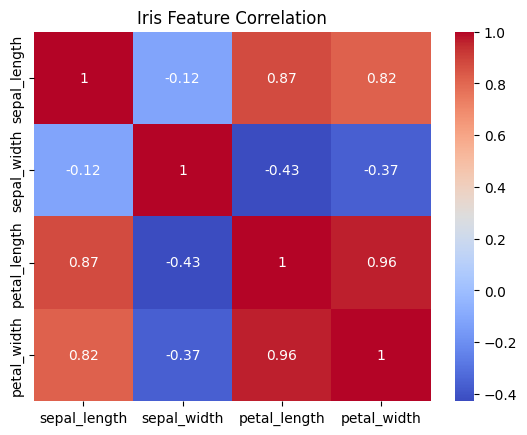

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Iris Feature Correlation")
plt.show()

### 무작위 표본 추출 (랜덤 샘플링)
• n: 추출할 샘플 수 <br>
• random_state: 재현 가능하도록 시드 고정

In [26]:
sample = iris.sample(n=30, random_state=42) # 랜덤 샘플 30개 추출, random_state 고정
print(sample.head()) # 샘플 데이터 출력

     sepal_length  sepal_width  petal_length  petal_width     species
73            6.1          2.8           4.7          1.2  versicolor
18            5.7          3.8           1.7          0.3      setosa
118           7.7          2.6           6.9          2.3   virginica
78            6.0          2.9           4.5          1.5  versicolor
76            6.8          2.8           4.8          1.4  versicolor


### 계층적 표본 추출 (Stratified Sampling)
- species 품종 비율을 유지하면서 표본 추출할 수 있음.

In [28]:
# 각 품종에서 10개씩 샘플링
sample_per_species = iris.groupby('species', group_keys=False).apply(lambda x: x.sample(n=10, random_state=42))
print(sample_per_species.head(10)) # 샘플 데이터 출력

    sepal_length  sepal_width  petal_length  petal_width species
13           4.3          3.0           1.1          0.1  setosa
39           5.1          3.4           1.5          0.2  setosa
30           4.8          3.1           1.6          0.2  setosa
45           4.8          3.0           1.4          0.3  setosa
17           5.1          3.5           1.4          0.3  setosa
48           5.3          3.7           1.5          0.2  setosa
26           5.0          3.4           1.6          0.4  setosa
25           5.0          3.0           1.6          0.2  setosa
32           5.2          4.1           1.5          0.1  setosa
19           5.1          3.8           1.5          0.3  setosa


/var/folders/vz/_88n189s37g3f6cvqm98x9m00000gn/T/ipykernel_12292/1933439054.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_per_species = iris.groupby('species', group_keys=False).apply(lambda x: x.sample(n=10, random_state=42))


### 비복원/복원 추출 옵션
- 비복원 추출 (중복 없이) : 기본값 <br>
- 복원 추출 (중복 가능)

In [30]:
# 복원 추출(replacement=True)로 30개 샘플링
replacement_sample = iris.sample(n=30, replace=True, random_state=42)
print(replacement_sample.head(10)) # 샘플 데이터 출력

     sepal_length  sepal_width  petal_length  petal_width     species
102           7.1          3.0           5.9          2.1   virginica
92            5.8          2.6           4.0          1.2  versicolor
14            5.8          4.0           1.2          0.2      setosa
106           4.9          2.5           4.5          1.7   virginica
71            6.1          2.8           4.0          1.3  versicolor
20            5.4          3.4           1.7          0.2      setosa
102           7.1          3.0           5.9          2.1   virginica
121           5.6          2.8           4.9          2.0   virginica
74            6.4          2.9           4.3          1.3  versicolor
87            6.3          2.3           4.4          1.3  versicolor


### 샘플 분포 시각화 (계층적 표본 추출(stratified sampling))
• x축: 품종(species) – setosa, versicolor, virginica <br>
• y축: 표본 수(count) – 각각 10개씩 <br>
• 각 막대의 높이가 같다는 건, 각 품종에서 동일한 개수(10개)씩 표본을 추출했다는 뜻

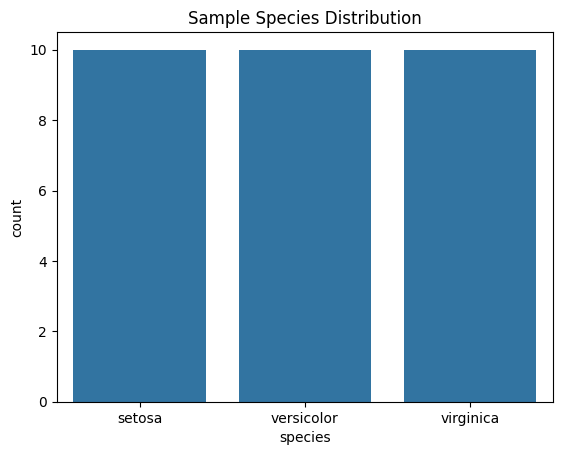

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
# 산점도 행렬
sns.countplot(data = sample_per_species, x='species')
plt.title("Sample Species Distribution")
plt.show()